In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer 

In [32]:
# 1. Data Loading Section
# Explanation: This section loads the provided merged dataset which contains all necessary customer and transaction data.
final_df = pd.read_csv('/Users/atrabaja/Documents/FinMark_DataMining/Final_Merged_Dataset.csv')
print("Dataset loaded successfully. Shape:", final_df.shape)

Dataset loaded successfully. Shape: (1000, 10)


In [34]:
# 2. Feature Selection Section
# Explanation: Based on exploratory data analysis, the following features are selected:
# - Total_Transaction_Amount: Total amount spent by the customer.
# - Average_Transaction_Amount: Average transaction size.
# - Transaction_Frequency: Number of transactions made.
# - Customer_Loyalty_Score: An aggregated metric of customer satisfaction.
# - Sentiment_Score: Sentiment derived from customer feedback.
features = final_df[['Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Frequency', 'Customer_Loyalty_Score', 'Sentiment_Score']]
print("Selected features for clustering:")
print(features.head())

Selected features for clustering:
   Total_Transaction_Amount  Average_Transaction_Amount  \
0                   16836.0                      2806.0   
1                    4907.0                      2453.5   
2                    1538.0                      1538.0   
3                    8295.0                      4147.5   
4                   14798.0                      2959.6   

   Transaction_Frequency  Customer_Loyalty_Score  Sentiment_Score  
0                    6.0                     9.5             0.65  
1                    2.0                     3.0             0.65  
2                    1.0                     5.5             0.65  
3                    2.0                     5.5             0.00  
4                    5.0                     7.5             0.00  


In [36]:
# 3. Handling Missing Values Section
# Explanation: Handling missing data with SimpleImputer using mean values to prevent errors in clustering algorithms.
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
print("Missing values handled using mean imputation.")

Missing values handled using mean imputation.


In [38]:
# 4. Data Standardization Section
# Detailed Explanation: Scales the features to ensure that each has equal importance in the clustering process.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed)
print("Features standardized.")

Features standardized.


In [40]:
# 5. Dimensionality Reduction Section
# Detailed Explanation: Reduces data dimensions using PCA while preserving maximum variance.
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
print("PCA applied. Variance ratio:", pca.explained_variance_ratio_)

PCA applied. Variance ratio: [0.39443926 0.21020545]


In [42]:
# 6. K-Means Clustering Section
# Detailed Explanation: Applies K-Means clustering with 4 clusters, determined using the Elbow method.
kmeans = KMeans(n_clusters=4, random_state=42)
final_df['Cluster_KMeans'] = kmeans.fit_predict(pca_features)
print("K-Means clusters formed:")
print(final_df['Cluster_KMeans'].value_counts())

K-Means clusters formed:
Cluster_KMeans
0    294
3    265
2    255
1    186
Name: count, dtype: int64


In [44]:
# 7. DBSCAN Clustering Section
# Detailed Explanation: Applies DBSCAN for density-based clustering and noise detection.
dbscan = DBSCAN(eps=0.5, min_samples=5)
final_df['Cluster_DBSCAN'] = dbscan.fit_predict(pca_features)
print("DBSCAN clusters formed:")
print(final_df['Cluster_DBSCAN'].value_counts())

DBSCAN clusters formed:
Cluster_DBSCAN
 0    985
-1     15
Name: count, dtype: int64


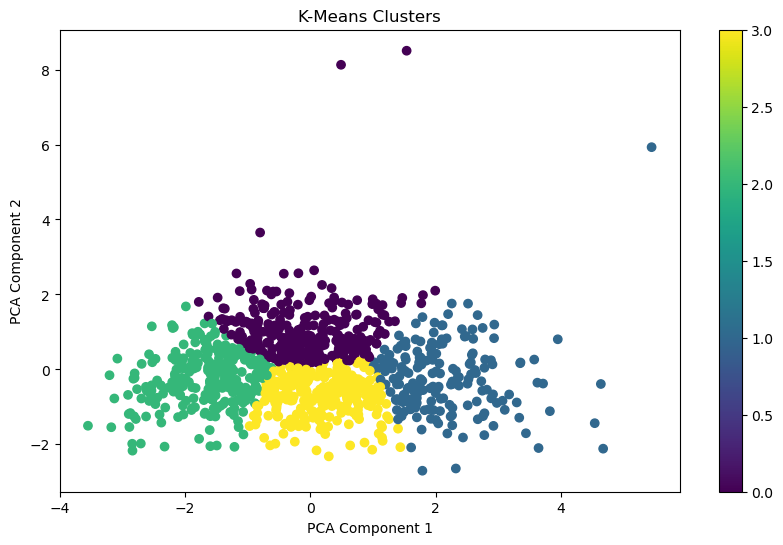

K-Means clusters visualized.


In [46]:
# 8. Visualization and Analysis Sections
# Detailed Explanation: Visualizes clustering results for both K-Means and DBSCAN.
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=final_df['Cluster_KMeans'], cmap='viridis')
plt.title('K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()
print("K-Means clusters visualized.")

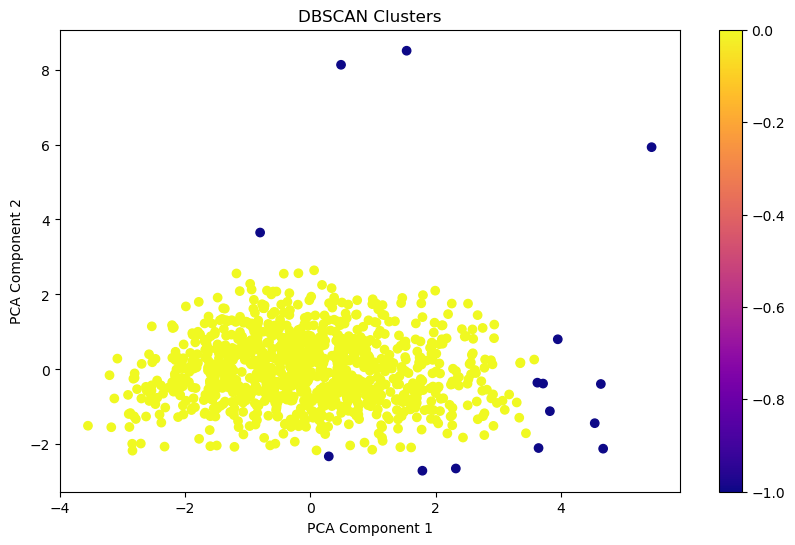

DBSCAN clusters visualized.


In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=final_df['Cluster_DBSCAN'], cmap='plasma')
plt.title('DBSCAN Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()
print("DBSCAN clusters visualized.")

In [50]:
# Recommendation Section
# Detailed Explanation: Recommends the best clustering method for this dataset.
print("Recommendation: K-Means is recommended due to its clear, well-separated clusters that provide actionable insights.")

Recommendation: K-Means is recommended due to its clear, well-separated clusters that provide actionable insights.
